# REMOVE BEFORE TURNING THIS IN!!!!!!! - Instructions

<h1><center>Financial Applications of Time Series</center></h1>
<center> David Tran, Frank Sclafani, Matthew Przybyla, and Brandon Hill</center>
<center> MSDS 7333 - Quantifying the World - Case Study 4 (Unit 4)</center>
<center> June 5 2018</center>

# Notebook Navigation

[1) Abstract](#Abstract) 

[2) Introduction](#Introduction)

[3) Literature Review](#Literature Review)

[4) Methods](#Methods) 

[5) Future Work, Discussion Conclusions, and Next Steps](#Future Work, Discussion Conclusions, and Next Steps) 

[6) References](#References) 

[7) Appendix - Code](#Appendix - Code) 

## Abstract

## Introduction

## Literature Review

## Background 

<font font-family= "Ariel"> The stock market volumes dataset was collected via the Yahoo Finance API. It contains 1,129 observations and 6 variables. There is no missing data for any of the variables in these 1,129 observations. Our objective is to analyze the historical daily adjusted closing stock prices for 5 major retail companies for the 4.5-year span between January 2nd, 2014 and May 1st, 2018. A full list of variable descriptions, including the Datetime variable in which the observation was captured and the data is indexed by, can be found in Table 1: </font>

|    Variable   |                                         Description                                         |    Type    |
|:-------------:|:-------------------------------------------------------------------------------------------:|:----------:|
| DatetimeIndex | Date observation was collected. (Index of data)                                             |    Date    |
| AMZN          | Amazon.com, Inc. adjusted close price adjusted for both dividends and   splits.             | Continuous |
| WMT           | Walmart Inc. adjusted close price adjusted for both dividends and splits.                   | Continuous |
| TGT           | Target Corporation adjusted close price adjusted for both dividends and   splits.           | Continuous |
| BBY           | Best Buy Co., Inc. adjusted close price adjusted for both dividends and   splits.           | Continuous |
| COST          | Costco Wholesale Corporation adjusted close price adjusted for both   dividends and splits. | Continuous |

## Methods

## Results

## Future Work, Discussion Conclusions, and Next Steps

## References

## Appendix - Code

### Signal frontier analysis

In [1]:
# This cell just tells the notebook to set the width of the cells in relation to the screen width
from IPython.display import display, HTML
display(HTML(data="""
<style>
    div#notebook-container    { width: 95%; }
    div#menubar-container     { width: 65%; }
    div#maintoolbar-container { width: 99%; }
</style>
"""))

In [2]:
print('Loading globals ...')

import datetime
import pandas as pd
start_dt=datetime.datetime(2014,1,1)
end_dt=datetime.datetime(2018,5,1)
from pandas_datareader import data as web

from __future__ import division
from pandas import Series, DataFrame
import pandas as pd
from numpy.random import randn
import numpy as np
pd.options.display.max_rows = 12
np.set_printoptions(precision=4, suppress=True)
import matplotlib.pyplot as plt
plt.rc('figure', figsize=(12, 6))

print('Globals Loaded')

Loading globals ...
Globals Loaded


In [3]:
print('')
print('Loading Data')


stock='AMZN'
px=pd.DataFrame({'AMZN':web.DataReader(stock,'iex', start_dt, end_dt)['close']})
names=['WMT','TGT', 'BBY','COST']
for stock in names:
    while True:
        try:
            px[stock]=web.DataReader(stock,'iex', start_dt, end_dt)['close']
            break
        except:
            print('Unable to read stock: {0}'.format(stock))
            print('trying again')
px.index=pd.to_datetime(px.index)

print('File Has Been Loaded')


Loading Data
5y
5y
5y
5y
5y
File Has Been Loaded


In [4]:
px = px.asfreq('B').fillna(method='pad')

In [5]:
px

,AMZN,WMT,TGT,BBY,COST
date,,,,,
2014-01-02,397.97,69.7200,54.3549,35.2887,104.1963
2014-01-03,396.44,69.4903,54.6216,35.4455,103.7364
2014-01-06,393.63,69.1015,54.2517,34.3389,102.9492
2014-01-07,398.03,69.3135,54.1226,33.4415,102.4716
2014-01-08,401.92,68.7658,53.9334,32.9709,100.8708
2014-01-09,401.01,68.9955,54.4926,32.7008,104.8154
...,...,...,...,...,...
2018-04-24,1460.09,85.9882,69.9301,73.1700,191.9502
2018-04-25,1460.17,86.6242,70.5350,74.3800,193.4059


In [6]:
plt.close('all')

In [7]:
px.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1129 entries, 2014-01-02 to 2018-05-01
Freq: B
Data columns (total 5 columns):
AMZN    1129 non-null float64
WMT     1129 non-null float64
TGT     1129 non-null float64
BBY     1129 non-null float64
COST    1129 non-null float64
dtypes: float64(5)
memory usage: 52.9 KB


In [8]:
px.describe()

,AMZN,WMT,TGT,BBY,COST
count,1129.000000,1129.000000,1129.000000,1129.000000,1129.000000
mean,682.026531,71.334432,62.903220,38.886397,142.247549
std,330.487770,10.171675,8.480836,14.262027,24.653175
min,286.950000,52.082500,47.377700,19.796500,97.448000
25%,374.410000,66.000300,53.886800,29.100000,128.146200
50%,640.950000,68.661900,64.416100,32.970900,142.184300
75%,884.670000,76.012900,70.376300,47.165500,157.374700
max,1598.390000,108.218900,77.347700,77.558500,197.802200


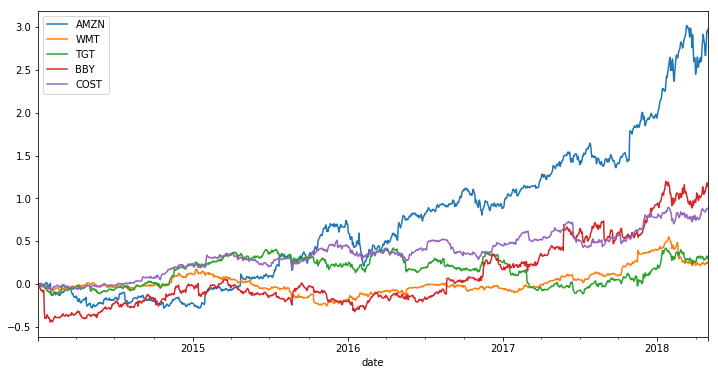

In [9]:
px = px.asfreq('B').fillna(method='pad')
rets = px.pct_change()
((1 + rets).cumprod() - 1).plot()
plt.show()

In [10]:
def calc_mom(price, lookback, lag):
    mom_ret = price.shift(lag).pct_change(lookback)
    ranks = mom_ret.rank(axis=1, ascending=False)
    demeaned = ranks.subtract(ranks.mean(axis=1), axis=0)
    return demeaned.divide(demeaned.std(axis=1), axis=0)

In [11]:
compound = lambda x : (1 + x).prod() - 1
daily_sr = lambda x: x.mean() / x.std()

def strat_sr(prices, lb, hold):
    # Compute portfolio weights
    freq = '%dB' % hold
    port = calc_mom(prices, lb, lag=1)

    daily_rets = prices.pct_change()

    # Compute portfolio returns
    port = port.shift(1).resample(freq, how='first')
    returns = daily_rets.resample(freq, how=compound)
    port_rets = (port * returns).sum(axis=1)

    return daily_sr(port_rets) * np.sqrt(252 / hold)

In [12]:
strat_sr(px, 70, 30)

C:\Users\JZW847\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:12: FutureWarning: how in .resample() is deprecated
the new syntax is .resample(...).first()
  if sys.path[0] == '':
C:\Users\JZW847\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:13: FutureWarning: how in .resample() is deprecated
the new syntax is .resample(...)..apply(<func>)
  del sys.path[0]


0.04269034571366383

In [13]:
from collections import defaultdict

lookbacks = range(20, 90, 5)
holdings = range(20, 90, 5)
dd = defaultdict(dict)
for lb in lookbacks:
    for hold in holdings:
        dd[lb][hold] = strat_sr(px, lb, hold)

ddf = DataFrame(dd)
ddf.index.name = 'Holding Period'
ddf.columns.name = 'Lookback Period'

C:\Users\JZW847\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:12: FutureWarning: how in .resample() is deprecated
the new syntax is .resample(...).first()
  if sys.path[0] == '':
C:\Users\JZW847\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:13: FutureWarning: how in .resample() is deprecated
the new syntax is .resample(...)..apply(<func>)
  del sys.path[0]


In [14]:
import matplotlib.pyplot as plt

def heatmap(df, cmap=plt.cm.gray_r):
    fig = plt.figure()
    ax = fig.add_subplot(111)
    axim = ax.imshow(df.values, cmap=cmap, interpolation='nearest')
    ax.set_xlabel(df.columns.name)
    ax.set_xticks(np.arange(len(df.columns)))
    ax.set_xticklabels(list(df.columns))
    ax.set_ylabel(df.index.name)
    ax.set_yticks(np.arange(len(df.index)))
    ax.set_yticklabels(list(df.index))
    plt.colorbar(axim)

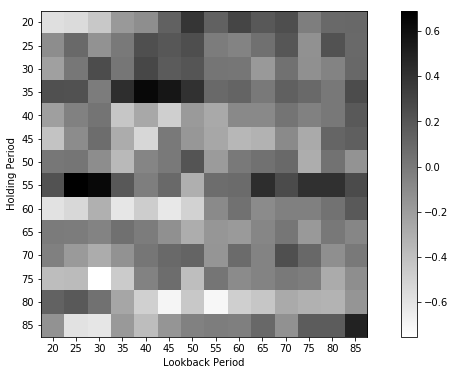

In [15]:
heatmap(ddf)
plt.show()

### Rolling correlation and linear regression

In [16]:

amzn = web.DataReader('AMZN', 'iex', start_dt, end_dt)['close']
wmt = web.DataReader('WMT', 'iex', start_dt, end_dt)['close']

amzn_rets = amzn.pct_change()
wmt_rets = wmt.pct_change()

5y
5y


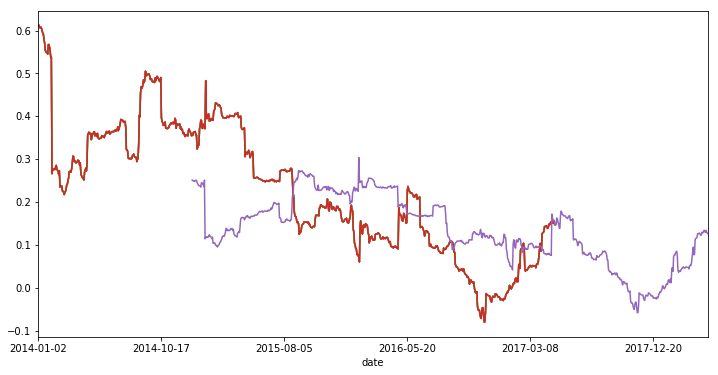

In [31]:
plt.figure()
plt.show()

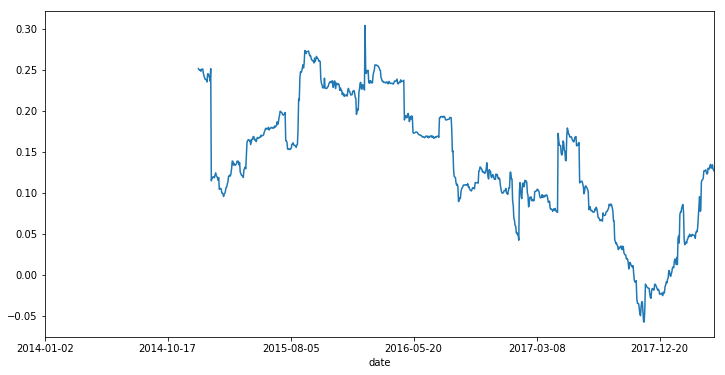

In [32]:
amzn_rets.rolling(250).corr(wmt_rets).plot()
plt.show()

In [33]:
plt.figure()
plt.show()

In [20]:
from pyfinance.ols import PandasRollingOLS
model = PandasRollingOLS(y=amzn_rets, x= wmt_rets, window=250)
model.beta

C:\Users\JZW847\AppData\Local\Continuum\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:52: RuntimeWarning: invalid value encountered in reduce
  return getattr(obj, method)(*args, **kwds)


,feature1
date,
2014-12-29,NaN
2014-12-30,0.611851
2014-12-31,0.606909
2015-01-02,0.606073
2015-01-05,0.607964
2015-01-06,0.604809
...,...
2018-04-24,0.151672
2018-04-25,0.151396


In [28]:
model.beta['feature1'].plot()


In [23]:
wmt_rets

date
2014-01-02         NaN
2014-01-03   -0.003295
2014-01-06   -0.005595
2014-01-07    0.003068
2014-01-08   -0.007902
2014-01-09    0.003340
                ...   
2018-04-24    0.004994
2018-04-25    0.007396
2018-04-26    0.008834
2018-04-27   -0.007391
2018-04-30    0.013404
2018-05-01   -0.011871
Name: close, Length: 1090, dtype: float64